<a href="https://colab.research.google.com/github/lezya/Machine-Learning/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Linear Regression**


Simple Regression:  y=mx+b

Multivariate regression: *f(x,y,z)* = w1x+w2y+w3z

in the world of ML, it is Y = Weights(w)*Input Features(X) + Bias(b) **bold text**

**Cost Function**

            MSE = (1/N)∑i=(yi−(mxi+b))′2

We can fined the derivative of this function w.r.t 2 variables viz w & b (weights and bias)

              
 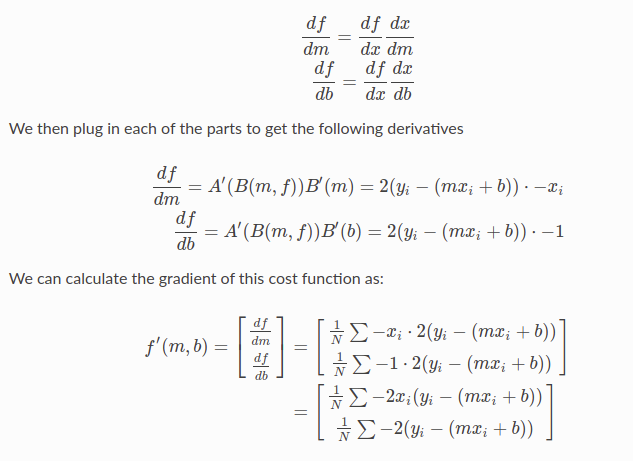


In [ ]:
#Imports
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
class LinearRegression:         

  def __init__(self, learning_rate=0.001, n_iters=1000):
    self.lr = learning_rate
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X,y):
      n_samples,n_features = X.shape

      #Initialize the Parameters
      self.weights = np.zeros(n_features)
      self.bias = 0

      #Gradient descent
      for _ in range(self.n_iters):
        y_predicted = np.dot(X, self.weights) + self.bias

        #'computing the gradients based on above formulas'
        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
        db = (1 / n_samples) * np.sum(y_predicted - y)

        #updating the weights and bias
        self.weights -= self.lr*dw
        self.bias -= self.lr*db

  def predict(self, X):
    y_approximation = np.dot(X, self.weights) + self.bias
    return y_approximation

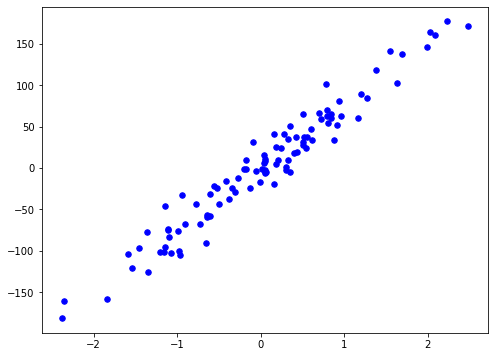

In [ ]:
def MSE(y_true, y_pred):
  return((y_true - y_pred)**2)


X,y  = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Inspect data
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30) 
plt.show()

In [ ]:
regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
print(predictions)

[  90.07616325   65.22041584  -45.69264845  -82.48790623   20.93884211
  -73.92169888  -14.9088548   151.65264231   14.01725303 -102.2910724
   15.56846563   41.60341884   26.20273534   38.12032261   37.38270397
  -37.35622388  -83.12304575   26.30377956   38.1309002    29.45253316]


In [ ]:
mse = MSE(y_test, predictions)
print("MSE:", mse)

MSE: [2.28743100e-01 1.02421320e+03 1.64366132e+02 1.84235970e-01
 3.90413462e+02 7.19069945e+02 1.75570181e+02 1.51073822e+02
 7.66203797e+01 6.00447411e+02 4.05232390e+01 2.24432986e+01
 1.00782240e+03 4.47443499e+01 7.37501747e+02 4.58828440e+01
 6.98033910e+01 6.06390107e+02 9.97294835e+01 1.38411544e+02]


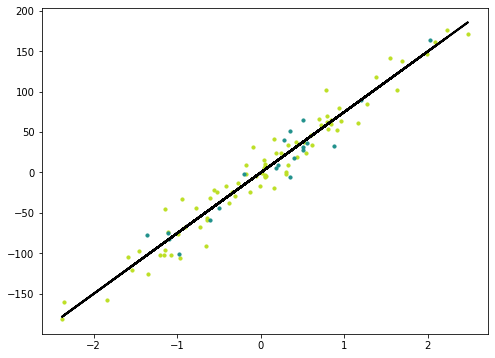

In [ ]:
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="Prediction")
plt.show()